# ИУ5-62Б Васильченко Д.Д.

# Научно-исследовательская работа на тему "Прогнозирование инсульта"

## Поиск и выбор набора данных для построения моделей машинного обучения.

В качестве набора данных мы будем использовать набор данных 
по прогнозированию инсульта - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Датасет состоит из одного файла: `healthcare-dataset-stroke-data.csv`

Файл содержит следующие колонки:
- id - уникальный идентификатор пациента.
- gender - пол пациента (“Male”, “Female”, “Other”).
- age - возраст пациента.
- hypertension - наличие гипертонии у пациента (0, если у пациента нет гипертонии, 1, если у пациента есть гипертония).
- heart_disease - наличие сердечных заболеваний у пациента (0, если у пациента нет сердечных заболеваний, 1, если у пациента есть сердечные заболевания).
- even_married - состоит ли пациент в браке (“No”, “Yes”).
- work_type - работает ли пациент, если работает, то как (“children”, “Govt_jov”, “Never_worked”, “Private”, “Self-employed”).
- Residence_type - место проживания пациента (“Rural”, “Urban”).
- avg_glucose_level - средний уровень глюкозы в крови пациента.
- bmi - индекс массы тела пациента.
- smoking_status - отношение пациента к курению (“formerly smoked”, “never smoked”, “smokes”, “Unknown”).
- stroke – целевой признак датасета: был ли у пациента инсульт (1, если у пациента был инсульт, 0 , если у пациента не было инсульта). 

Будем решать задачу классификации: в качестве целевого признака будем использовать `stroke`. Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [2]:
original_train = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=",")

In [3]:
# Удалим дубликаты записей, если они присутствуют
train = original_train.drop_duplicates()

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

### Основные характеристики датасета

In [4]:
# Первые 5 строк датасета
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Размер датасета - 5110 строк, 12 колонок
train.shape

(5110, 12)

In [6]:
# Список колонок
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# Список колонок с типами данных 
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
train.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
train.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Значение `Other` признака `gender` составляет очень незначительную долю от всего количества записей (1 из 5110). Удалим единственную строку с таким значением, т.к. оно не пригодится для дальнейшей работы.

In [10]:
train = train[train.gender != 'Other']

In [11]:
train.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [12]:
# Проверим наличие пустых значений
train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Видим, что у признака `bmi` 201 пропуска.

### Обработка пропусков

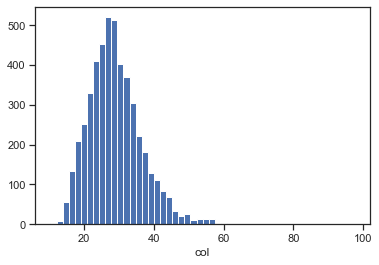

In [13]:
# Гистограмма по признаку 'bmi'
plt.hist(train['bmi'], 50)
plt.xlabel('col')
plt.show()

In [14]:
from sklearn.impute import SimpleImputer
train['bmi'] = SimpleImputer(strategy='median').fit_transform(train['bmi'].values.reshape(-1, 1))

In [15]:
# Проверим наличие пустых значений
train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Вывод. Представленный набор данных содержал пропуски в значениях признака `bmi`, которые были обработаны путем их заполнения средним значением.**

### Построение графиков для понимания структуры данных

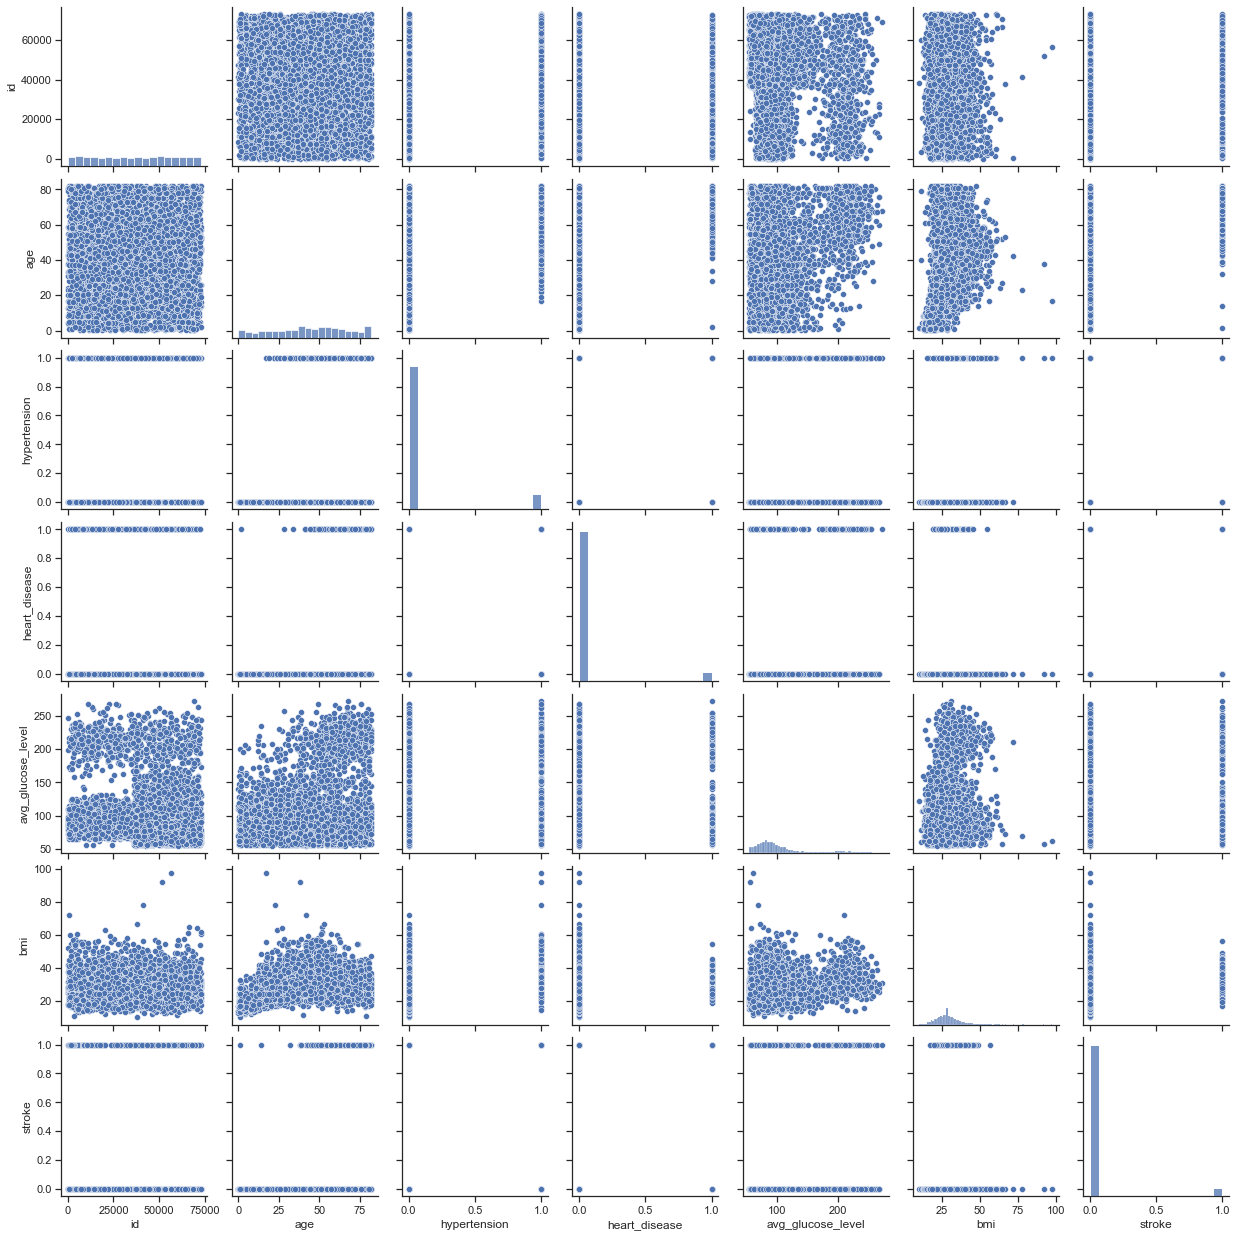

In [16]:
# Парные диаграммы
sns.pairplot(train)

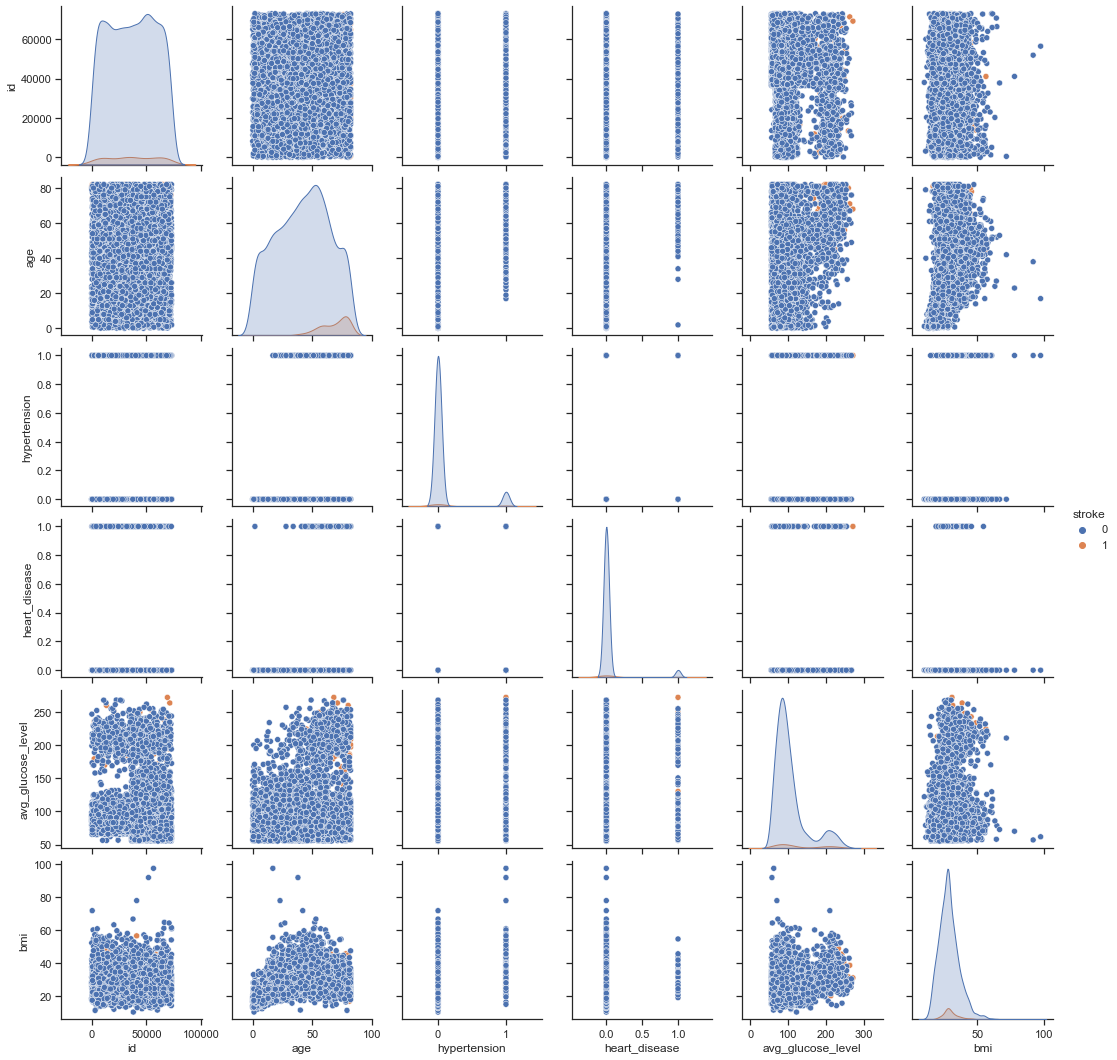

In [17]:
sns.pairplot(train, hue="stroke")

In [18]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
train['stroke'].unique()

array([1, 0], dtype=int64)

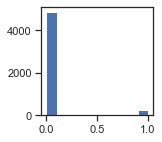

In [19]:
# Оценим дисбаланс классов для stroke
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(train['stroke'])
plt.show()

In [20]:
train['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [21]:
# посчитаем дисбаланс классов
total = train.shape[0]
class_0, class_1 = train['stroke'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 95.13000000000001%, а класс 1 составляет 4.87%.


**Вывод. Дисбаланс классов присутствует, причем довольно сильный.**

In [22]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 647.9+ KB


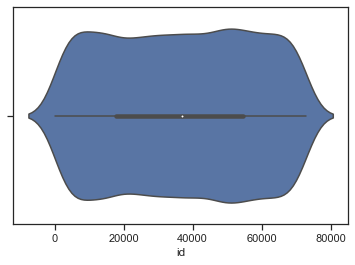

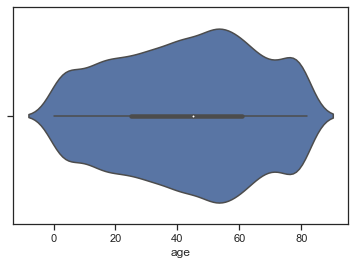

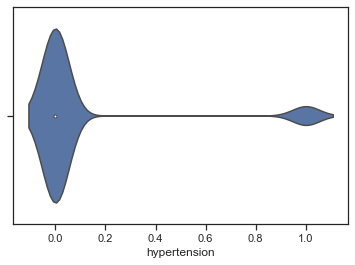

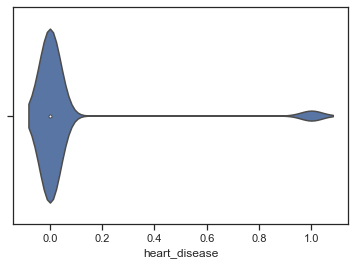

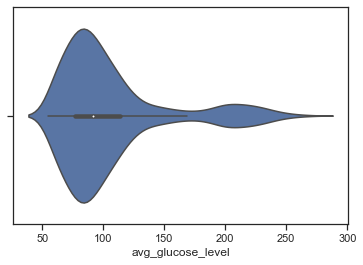

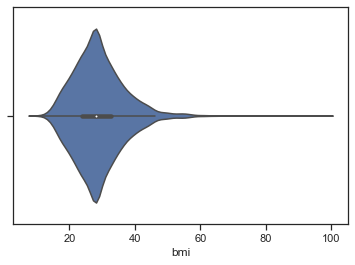

In [24]:
# Скрипичные диаграммы для числовых колонок
for col in ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']:
    sns.violinplot(x=train[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [25]:
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Для построения моделей будем использовать все признаки кроме признака id, потому что данный признак не енсет никакой смысловой нагрузки по отношению к прогнозируемому.

Присутствуют категориальные признаки `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, требуется их кодирование.

In [26]:
cat_columns = [cname for cname in train.columns
                        if train[cname].dtype == 'object']

for col in cat_columns:
    print('Уникальные значения признака '+ col + ': ', end='')
    print(train[col].unique())

Уникальные значения признака gender: ['Male' 'Female']
Уникальные значения признака ever_married: ['Yes' 'No']
Уникальные значения признака work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Уникальные значения признака Residence_type: ['Urban' 'Rural']
Уникальные значения признака smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [27]:
cat_columns = [cname for cname in train.columns
                        if train[cname].dtype == 'object']

encoder = LabelEncoder()

for col in cat_columns:
    train[col] = encoder.fit_transform(train[col])

In [28]:
train.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [29]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


Вспомогательные признаки для улучшения качества моделей мы строить не будем.

Выполним масштабирование данных.

In [30]:
# Числовые колонки для масштабирования
scale_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
              'avg_glucose_level', 'bmi', 'smoking_status']

In [31]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(train[scale_cols])

In [32]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    train[new_col_name] = sc1_data[:,i]

In [33]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_scaled,age_scaled,hypertension_scaled,heart_disease_scaled,ever_married_scaled,work_type_scaled,Residence_type_scaled,avg_glucose_level_scaled,bmi_scaled,smoking_status_scaled
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,...,1.0,0.816895,0.0,1.0,1.0,0.50,1.0,0.801265,0.301260,0.333333
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,...,0.0,0.743652,0.0,0.0,1.0,0.75,0.0,0.679023,0.203895,0.666667
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,...,1.0,0.975586,0.0,1.0,1.0,0.50,0.0,0.234512,0.254296,0.666667
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,...,0.0,0.597168,0.0,0.0,1.0,0.50,1.0,0.536008,0.276060,1.000000
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,...,0.0,0.963379,1.0,0.0,1.0,0.75,0.0,0.549349,0.156930,0.666667


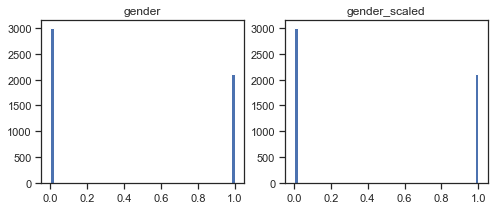

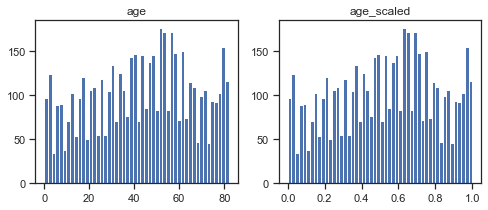

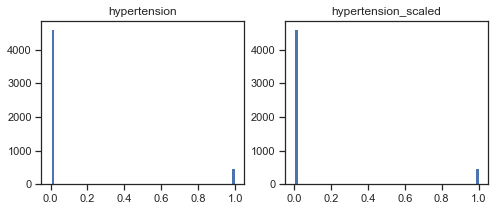

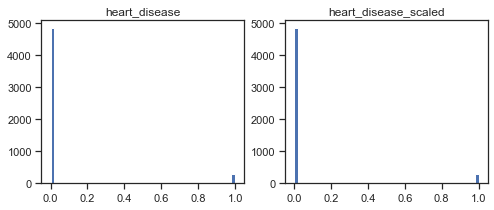

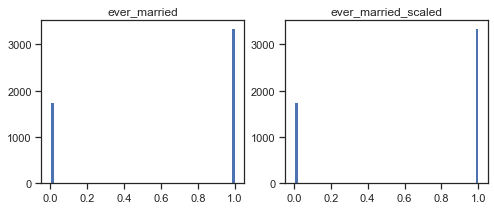

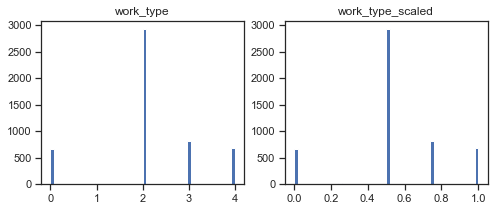

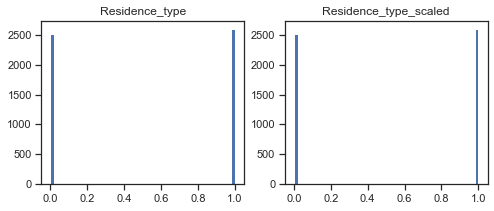

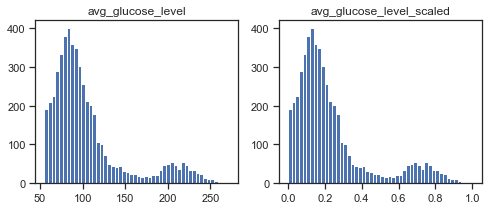

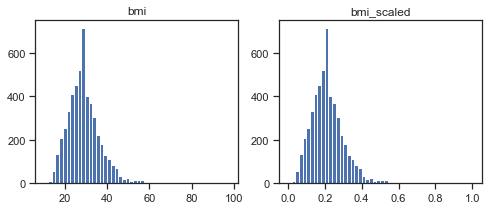

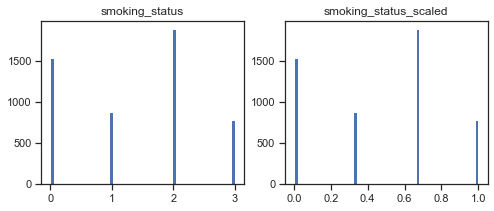

In [34]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(train[col], 50)
    ax[1].hist(train[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. 

In [35]:
corr_cols_1 = scale_cols + ['stroke']
corr_cols_1

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [36]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['stroke']
corr_cols_2

['gender_scaled',
 'age_scaled',
 'hypertension_scaled',
 'heart_disease_scaled',
 'ever_married_scaled',
 'work_type_scaled',
 'Residence_type_scaled',
 'avg_glucose_level_scaled',
 'bmi_scaled',
 'smoking_status_scaled',
 'stroke']

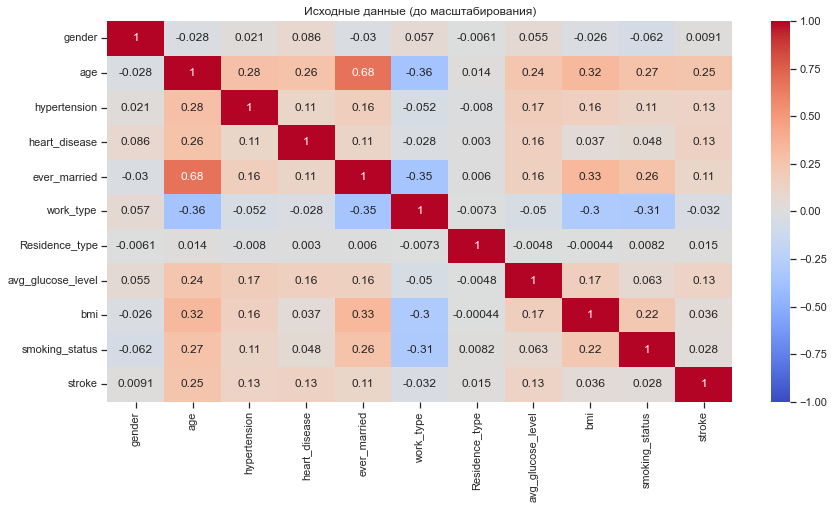

In [37]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_1].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования)')
plt.show()

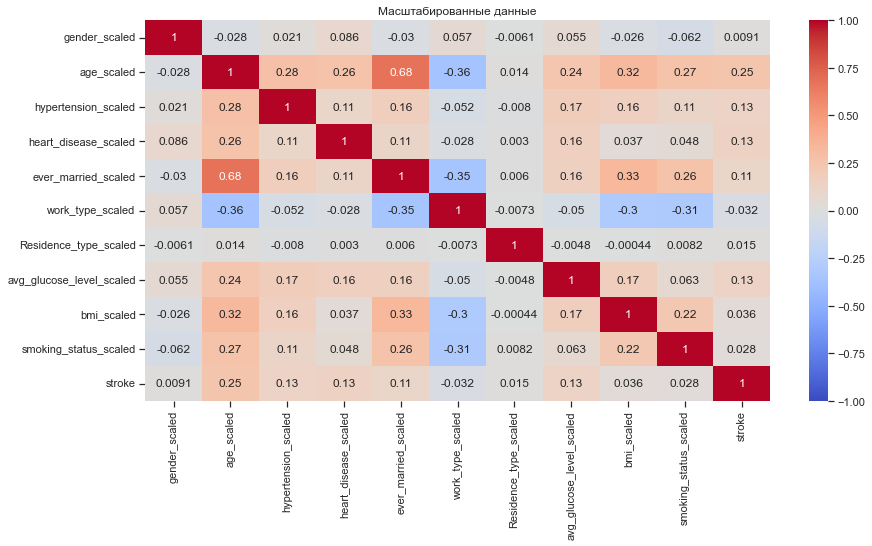

In [38]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[corr_cols_2].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Масштабированные данные')
plt.show()

In [39]:
print('Признаки, имеющие максимальную по модулю корреляцию с целевым признаком')
best_params = train[corr_cols_1].corr()['stroke'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.1]
best_params

Признаки, имеющие максимальную по модулю корреляцию с целевым признаком


age                  0.245239
heart_disease        0.134905
avg_glucose_level    0.131991
hypertension         0.127891
ever_married         0.108299
Name: stroke, dtype: float64

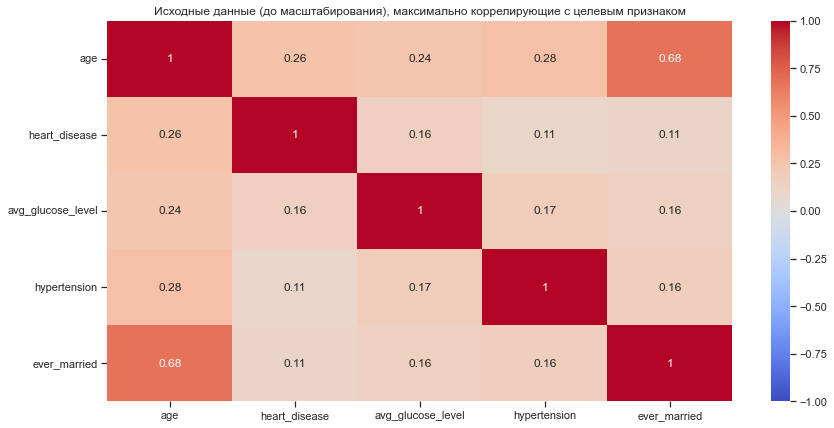

In [40]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(train[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
ax.set_title('Исходные данные (до масштабирования), максимально коррелирующие с целевым признаком')
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

- Корреляционные матрицы для исходных и масштабированных данных совпадают.
- Целевой признак классификации `stroke` наиболее сильно коррелирует с возрастом пациента (0.25), наличием или отсутствием сердечных заболеваний у пациента  (0.14), средним уровнем глюкозы в крови пациента (0.13), наличием или отсутствием гипертонии у пациента (0.13), состоял ли пациент в браке (0.11). Эти признаки обязательно следует оставить в модели классификации.
- Небольшие по модулю значения коэффициентов корреляции свидетельствуют о незначительной корреляции между исходными признаками и целевым признаком.

## Выбор метрик для последующей оценки качества моделей. 

### В качестве метрик для решения задачи классификации  будем использовать:

Метрики, формируемые на основе матрицы ошибок:

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика $F_1$-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

#### Метрика ROC AUC

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### Сохранение и визуализация метрик

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [41]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

## Выбор наиболее подходящих моделей для решения задачи классификации.

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [42]:
# Признаки для задачи классификации
task_clas_cols = ['age_scaled', 'heart_disease_scaled', 
                  'avg_glucose_level_scaled', 'hypertension_scaled', 
                  'ever_married_scaled']

In [43]:
y = train['stroke']
X = train[task_clas_cols]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3576, 5), (1533, 5), (3576,), (1533,))

## Балансировка классов целевого признака.

Так как на этапе проведения разведочного анализа данных был выявлен сильный дисбаланс классов целевого признака `stroke`, то проведем балансировку датасета. Используем для этого предискретизацию SMOTE.

In [45]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4860 

After OverSampling, the shape of train_X: (6788, 5)
After OverSampling, the shape of train_y: (6788,) 

After OverSampling, counts of label '1': 3394
After OverSampling, counts of label '0': 3394


In [46]:
x_train,y_train = X_res, y_res
x_train.shape, y_train.shape

((6788, 5), (6788,))

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [80]:
# Модели
clas_models = {'LogR_l2-1.0-lbfgs': LogisticRegression(random_state=3), 
               'SVC_1.0':SVC(probability=True, random_state=3),
               'Tree_2':DecisionTreeClassifier(random_state=3),
               'RF_100-gini-auto-1':RandomForestClassifier(random_state=3),
               'GB_deviance-100-friedman_mse-1':GradientBoostingClassifier(random_state=3)}

In [81]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [82]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [83]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(x_train, y_train)
    # Предсказание значений
    Y_pred = model.predict(x_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(x_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, Y_pred)
    recall = recall_score(y_test.values, Y_pred)
    f1 = f1_score(y_test.values, Y_pred)
    roc_auc = roc_auc_score(y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, x_test, y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


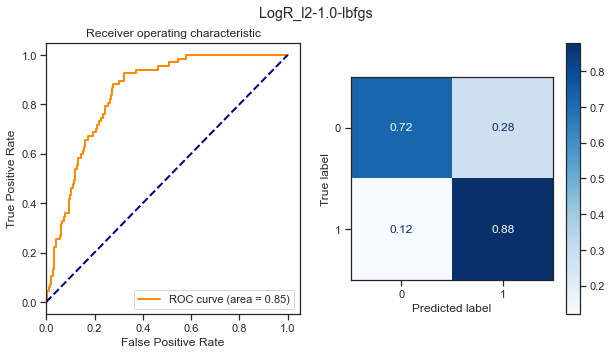

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


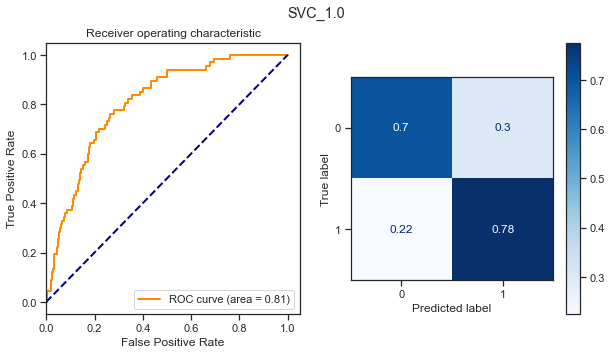

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


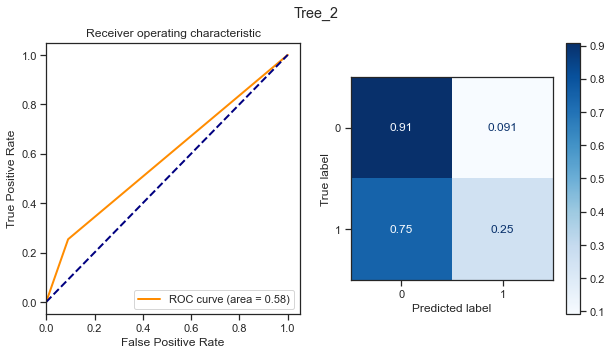

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


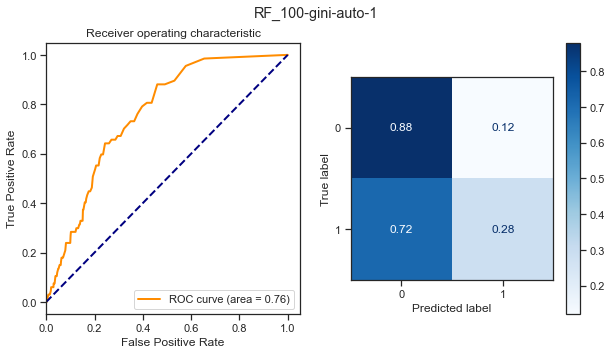

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


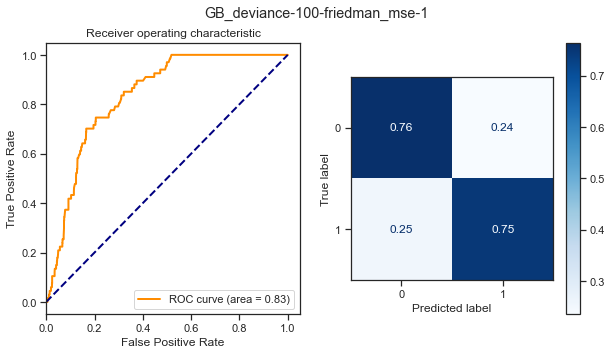

In [84]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Подбор гиперпараметров для выбранных моделей.

### Логистическая регрессия

In [85]:
x_train.shape

(6788, 5)

In [86]:
params = {'penalty': ['l1','l2'],
         'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)]),
         'solver'  : ['liblinear', 'saga'],
         }

In [87]:
%%time
logR_gs = GridSearchCV(LogisticRegression(random_state=3), param_grid=params, cv=10, n_jobs=-1, scoring='roc_auc')
logR_gs.fit(x_train, y_train)

Wall time: 26.3 s


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=3), n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  3. ,  4. ,
        5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. , 14. ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [88]:
logR_gs.best_estimator_

LogisticRegression(C=0.5, random_state=3, solver='liblinear')

In [89]:
logR_gs_best_params_txt = str(logR_gs.best_params_['penalty']) + '-' + str(logR_gs.best_params_['C']) + '-' + str(logR_gs.best_params_['solver'])
logR_gs_best_params_txt

'l2-0.5-liblinear'

Таким образом, наилучшие параметры для модели логистической регрессии: `C=0.5`, `solver='liblinear'`, `penalty='l2'`.

### Машина опорных векторов

In [90]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}

In [91]:
%%time
SVC_gs = GridSearchCV(SVC(probability=True, random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
SVC_gs.fit(x_train, y_train)

Wall time: 9min 48s


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=3), n_jobs=-1,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  3. ,  4. ,
        5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. , 14. ])},
             scoring='roc_auc')

In [92]:
SVC_gs.best_estimator_

SVC(C=14.0, probability=True, random_state=3)

In [93]:
SVC_gs_best_params_txt = str(SVC_gs.best_params_['C'])
SVC_gs_best_params_txt

'14.0'

Таким образом, наилучшие параметры для модели машины опорных векторов: `C=14.0`.

### Решающее дерево

In [64]:
params = {'min_samples_leaf': range(3, 30)}

In [65]:
%%time
desTreeClas_gs = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
desTreeClas_gs.fit(x_train, y_train)

Wall time: 1.6 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'min_samples_leaf': range(3, 30)}, scoring='roc_auc')

In [66]:
desTreeClas_gs.best_estimator_

DecisionTreeClassifier(min_samples_leaf=10, random_state=3)

In [67]:
desTreeClas_gs_best_params_txt = str(desTreeClas_gs.best_params_['min_samples_leaf'])
desTreeClas_gs_best_params_txt

'10'

Таким образом, наилучшие параметры для модели решающего дерева: `min_samples_leaf=10`.

### Случайный лес

In [68]:
params = {'n_estimators': [100, 1000], 'criterion': ['gini', 'entropy'], 
          'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 3, 5]}

In [69]:
%%time
randForestClas_gs = GridSearchCV(RandomForestClassifier(random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
randForestClas_gs.fit(x_train, y_train)

Wall time: 6min 46s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 1000]},
             scoring='roc_auc')

In [70]:
randForestClas_gs.best_estimator_

RandomForestClassifier(n_estimators=1000, random_state=3)

In [71]:
randForestClas_gs_best_params_txt = str(randForestClas_gs.best_params_['n_estimators']) + '-' + str(randForestClas_gs.best_params_['criterion']) + '-' + str(randForestClas_gs.best_params_['max_features']) + '-' + str(randForestClas_gs.best_params_['min_samples_leaf'])
randForestClas_gs_best_params_txt

'1000-gini-auto-1'

Таким образом, наилучшие параметры для модели случайного леса: `n_estimators=1000`, `criterion='gini'`, `max_features='auto'`, `min_samples_leaf=1`.

### Градиентный бустинг

In [72]:
params = {'loss': ['deviance', 'exponential'], 'n_estimators': [10, 50, 100, 200], 
          'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'], 'min_samples_leaf': [1, 3, 5]}

In [73]:
%%time
GrBoostClas_gs = GridSearchCV(GradientBoostingClassifier(random_state=3), param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
GrBoostClas_gs.fit(x_train, y_train)

Wall time: 39min 37s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=3),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='roc_auc')

In [74]:
GrBoostClas_gs.best_estimator_

GradientBoostingClassifier(criterion='squared_error', n_estimators=200,
                           random_state=3)

In [75]:
GrBoostClas_gs_best_params_txt = str(GrBoostClas_gs.best_params_['loss']) + '-' + str(GrBoostClas_gs.best_params_['n_estimators']) + '-' + str(GrBoostClas_gs.best_params_['criterion']) + '-' + str(GrBoostClas_gs.best_params_['min_samples_leaf'])
GrBoostClas_gs_best_params_txt

'deviance-200-squared_error-1'

Таким образом, наилучшие параметры для модели градиентного бустинга: `loss='deviance'`, `n_estimators=200`, `criterion='squared_error'`, `min_samples_leaf=1`.

## Построение решения для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Решение задачи классификации

In [95]:
clas_models_grid = {'LogR_l2-1.0-lbfgs': LogisticRegression(random_state=3),
                   str('LogR_' + logR_gs_best_params_txt):logR_gs.best_estimator_,
                   'SVC_1.0': SVC(probability=True, random_state=3),
                   str('SVC_' + SVC_gs_best_params_txt):SVC_gs.best_estimator_,
                   'Tree_2': DecisionTreeClassifier(random_state=3),
                   str('Tree_' + desTreeClas_gs_best_params_txt):desTreeClas_gs.best_estimator_,
                   'RF_100-gini-auto-1': RandomForestClassifier(random_state=3),
                   str('RF_' + randForestClas_gs_best_params_txt):randForestClas_gs.best_estimator_,
                   'GB_deviance-100-friedman_mse-1': GradientBoostingClassifier(random_state=3),
                   str('GB_' + GrBoostClas_gs_best_params_txt):GrBoostClas_gs.best_estimator_
                   }

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


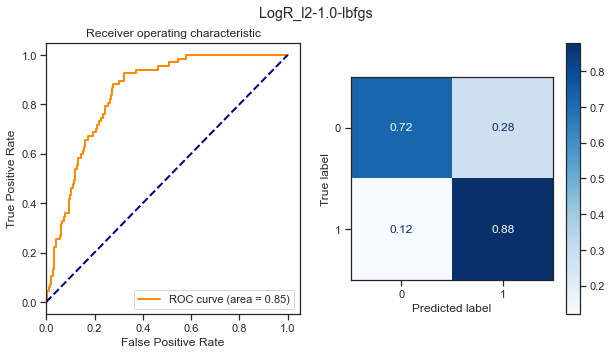

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


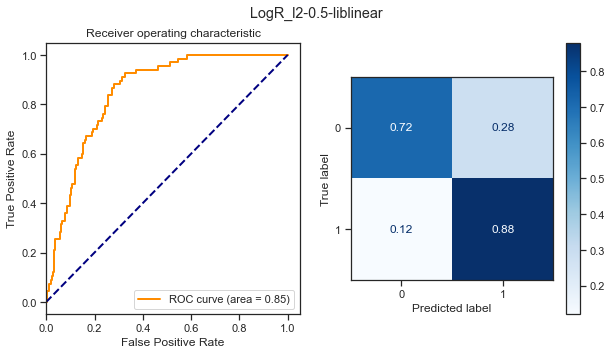

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


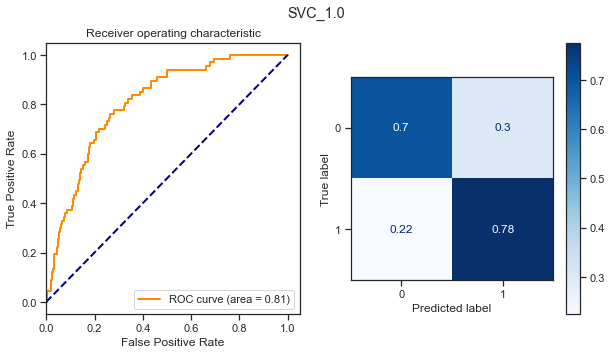

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


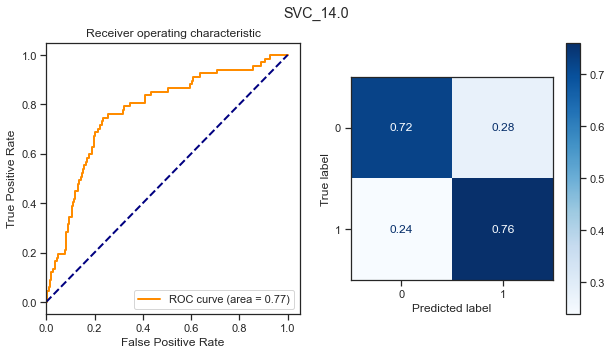

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


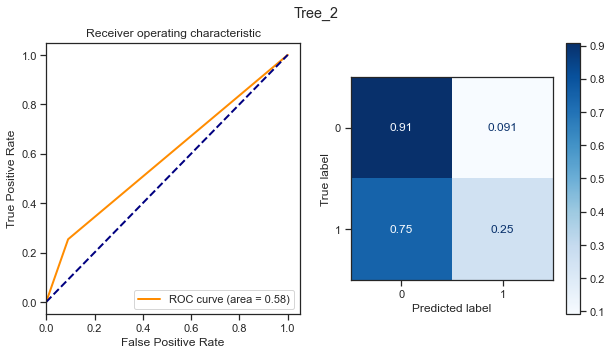

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


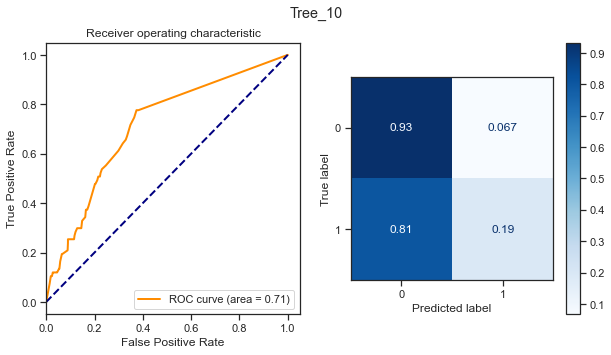

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


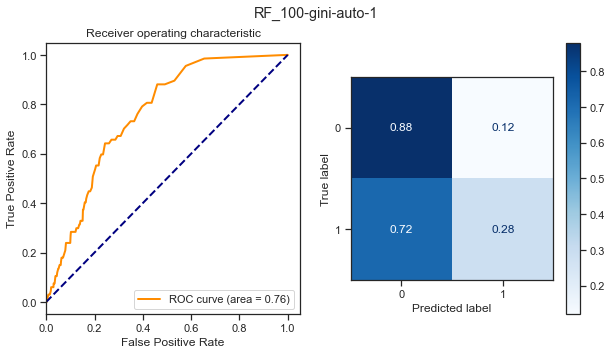

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


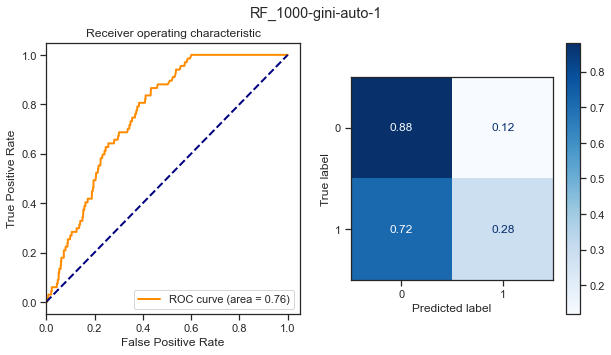

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


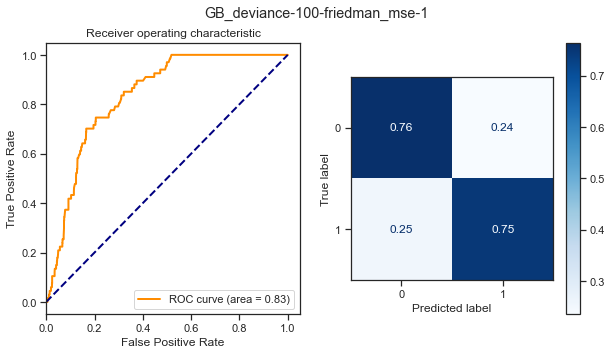

C:\Users\Дарья Васильченко\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


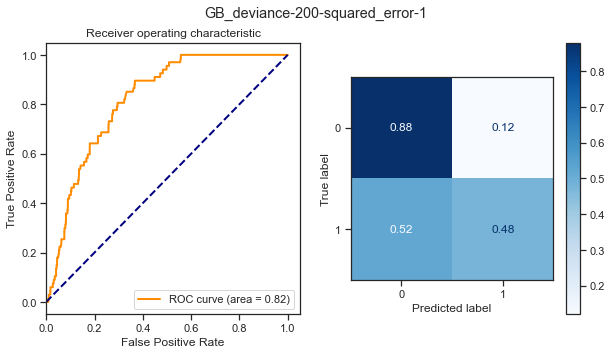

In [96]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [97]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

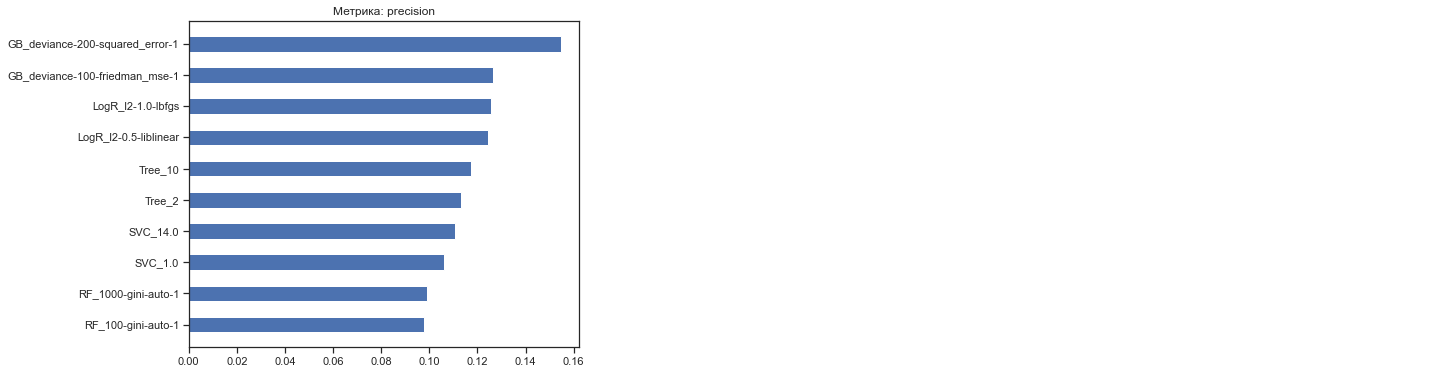

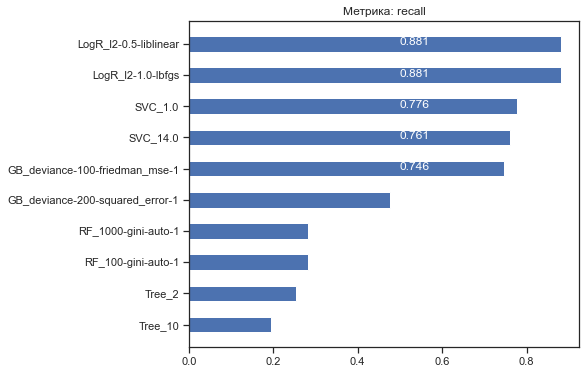

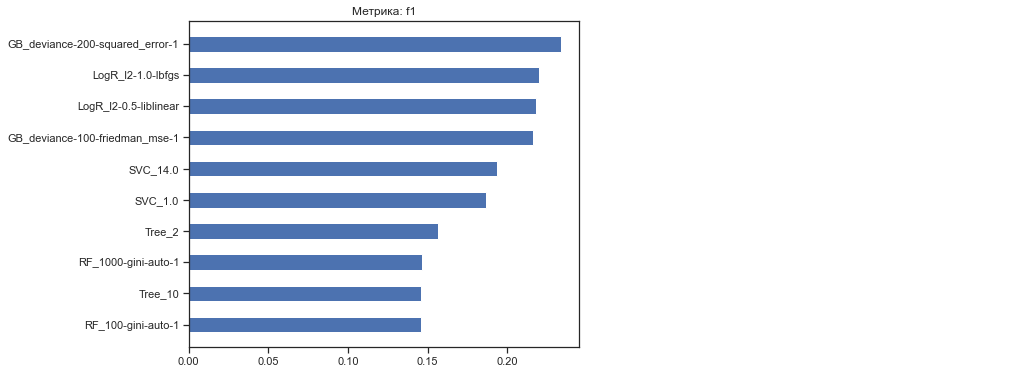

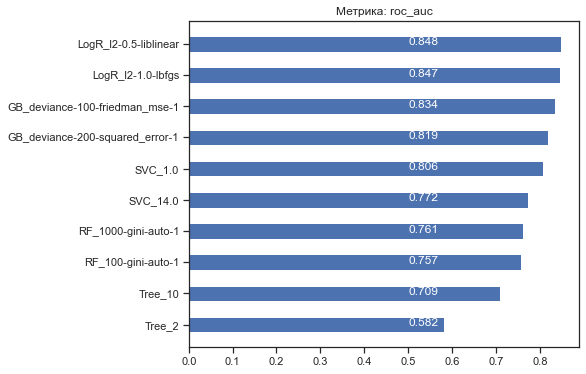

In [98]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

**Вывод. На основании двух метрик (recall, roc_auc) из четырех используемых,  лучшей оказалась модель логистической регрессии. На основании двух других метрик (precision, f1) лучшей оказалась модель градиентного бустинга. Таким образом, обе модели, логистическая регрессия и градиентный бустинг, показали примерно равные результаты и являются лучшими.**